In [117]:
import argparse
import sys
import os
import json
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import torch
from collections import Counter

In [118]:
BASE_DIR = "/Users/katemarg/PycharmProjects/temporal_robustness_evaluation"
DATA_DIR = os.path.join(BASE_DIR, 'data')
RES_DIR = os.path.join(BASE_DIR, 'new_results')
SINGLE_TOKEN_DIR = os.path.join(RES_DIR, 'single_token')
SINGLE_TOKEN_DIR_csv = os.path.join(RES_DIR, 'single_token', 'csv_files')
LOG_DIR = os.path.join(BASE_DIR, 'new_logs')
CACHE_DIR = os.path.join(BASE_DIR, 'cached')

models = [
            'cardiffnlp/twitter-roberta-base-2019-90m',
            'cardiffnlp/twitter-roberta-base-mar2020',
            'cardiffnlp/twitter-roberta-base-jun2020',
            'cardiffnlp/twitter-roberta-base-sep2020',
            'cardiffnlp/twitter-roberta-base-dec2020',
            'cardiffnlp/twitter-roberta-base-mar2021',
            'cardiffnlp/twitter-roberta-base-jun2021',
            'cardiffnlp/twitter-roberta-base-sep2021',
            'cardiffnlp/twitter-roberta-base-dec2021',
            # 'cardiffnlp/twitter-roberta-base-2021-124m',
            'cardiffnlp/twitter-roberta-base-mar2022',
            'cardiffnlp/twitter-roberta-base-jun2022'
        ]

## This notebook analyses the results with the single-token test data.

In [119]:
# for full log open
# torch.load(os.path.join(RES_DIR, "full_results_twitter-roberta-base-mar2022_2019-Q2_deleted_100_5_1234.pt"))

In [120]:
results_df = pd.DataFrame()
# updated/deleted/new
filepath = "timelms_dynamic-templama_2019-1-1_to_2022-6-31_per_quarter_single_token_updated_new_deleted.csv"
results_df = results_df.append(pd.read_csv(os.path.join(SINGLE_TOKEN_DIR, filepath)))

/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_65802/951728859.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(SINGLE_TOKEN_DIR, filepath)))


In [121]:
# unchanged
# _filepath="/Users/katemarg/PycharmProjects/temporal_robustness_evaluation/new_results/single_token/csv_files/90m_dynamic-templama_2019-1-1_to_2022-6-31_per_quarter_single_token_unchanged.csv"
for model in models:
    filepath = "{}_dynamic-templama_2019-1-1_to_2022-6-31_per_quarter_single_token_unchanged.csv".format(model.split("-")[-1])
    file = os.path.join(SINGLE_TOKEN_DIR_csv,filepath)
#     print(file)
    results_df = results_df.append(pd.read_csv(os.path.join(SINGLE_TOKEN_DIR_csv, filepath)))

/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_65802/3494036750.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(SINGLE_TOKEN_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_65802/3494036750.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(SINGLE_TOKEN_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_65802/3494036750.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.read_csv(os.path.join(SINGLE_TOKEN_DIR_csv, filepath)))
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_65802/3494036750.py:

In [122]:
results_df

,Unnamed: 0,model,dataset,quarter,size,split,P@1,P@10,P@20,P@50,...,same_pos,mrr,avg_f1_micro,avg_f1_macro,avg_rouge,avg_bleu,avg_bleu_uni,avg_bert_score,avg_pppl,all_pppl_scores
0,0,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q2,1,updated,0.0000,0.0000,0.0000,0.0000,...,0.6869,0.0000,NaN,NaN,NaN,NaN,NaN,0.8418,NaN,NaN
1,1,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q2,9,new,0.2222,0.2222,0.3333,0.4444,...,0.5608,0.2320,NaN,NaN,NaN,NaN,NaN,0.9068,NaN,NaN
2,2,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q2,7,deleted,0.1429,0.1429,0.1429,0.2857,...,0.5895,0.1480,NaN,NaN,NaN,NaN,NaN,0.9029,NaN,NaN
3,3,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q3,3,updated,0.0000,0.0000,0.0000,0.0000,...,0.0669,0.0034,NaN,NaN,NaN,NaN,NaN,0.8295,NaN,NaN
4,4,cardiffnlp/twitter-roberta-base-2019-90m,dynamic-templama,2019-Q3,7,new,0.2857,0.4286,0.4286,0.4286,...,0.7679,0.3080,NaN,NaN,NaN,NaN,NaN,0.9255,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,8,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2021-Q2,497,unchanged,0.1026,0.2334,0.2857,0.4145,...,NaN,0.1536,NaN,NaN,NaN,NaN,NaN,0.8861,NaN,NaN
9,9,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2021-Q3,479,unchanged,0.1023,0.2317,0.2839,0.4134,...,NaN,0.1531,NaN,NaN,NaN,NaN,NaN,0.8865,NaN,NaN
10,10,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2021-Q4,478,unchanged,0.0962,0.2259,0.2782,0.4079,...,NaN,0.1472,NaN,NaN,NaN,NaN,NaN,0.8854,NaN,NaN
11,11,cardiffnlp/twitter-roberta-base-jun2022,dynamic-templama,2022-Q1,477,unchanged,0.0943,0.2285,0.2851,0.4130,...,NaN,0.1470,NaN,NaN,NaN,NaN,NaN,0.8856,NaN,NaN


In [123]:
# change model names
results_df['model'] = results_df['model'].apply(lambda x: x.split('-')[-1])
results_df.loc[results_df['model'] == "90m", 'model'] = "2019-Q4"
results_df.loc[results_df['model'] == "mar2020", 'model'] = "2020-Q1"
results_df.loc[results_df['model'] == "jun2020", 'model'] = "2020-Q2"
results_df.loc[results_df['model'] == "sep2020", 'model'] = "2020-Q3"
results_df.loc[results_df['model'] == "dec2020", 'model'] = "2020-Q4"
results_df.loc[results_df['model'] == "mar2021", 'model'] = "2021-Q1"
results_df.loc[results_df['model'] == "jun2021", 'model'] = "2021-Q2"
results_df.loc[results_df['model'] == "sep2021", 'model'] = "2021-Q3"
results_df.loc[results_df['model'] == "dec2021", 'model'] = "2021-Q4"
results_df.loc[results_df['model'] == "mar2022", 'model'] = "2022-Q1"
results_df.loc[results_df['model'] == "jun2022", 'model'] = "2022-Q2"

In [125]:
# set(results_df['model'])

In [127]:
# results_df

In [89]:
def boxplot_vis(label, df):
    sns.barplot(x='year', y=label, data=df, hue='model', palette="rocket")
    sns.despine(offset=10, trim=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title("TempLAMA / single token / {}".format(label))
    plt.xticks(rotation=45)
    plt.savefig('plots/{}_per_quarter.png'.format(label), bbox_inches = 'tight',edgecolor='white')

In [90]:
def plot_all(results_df):
    fig, axs = plt.subplots(3,1, figsize=(12, 20), sharex=True)
    sns.barplot(x='quarter', y="P@1", data=results_df, hue='model', palette="rocket", ax=axs[0], ci=None)
    sns.barplot(x='quarter', y="mrr", data=results_df, hue='model', palette="rocket", ax=axs[1], ci=None)
    sns.barplot(x='quarter', y="avg_bert_score", data=results_df, hue='model', palette="rocket", ax=axs[2])
    # sns.barplot(x='year', y="P@20", data=results_df, hue='model', palette="rocket", ax=axs[3])
    # sns.barplot(x='year', y="P@50", data=results_df, hue='model', palette="rocket", ax=axs[4])
    # sns.barplot(x='year', y="P@100", data=results_df, hue='model', palette="rocket", ax=axs[5])
    [ax.get_legend().remove() for ax in axs[:-1]]
    [ax.set_xlabel("") for ax in axs[:-1]]
    axs[-1].set_xlabel("Test split (quarter)")
    plt.legend(bbox_to_anchor=(1.05,1.8), loc='upper left', borderaxespad=0, prop={'size': 22}, title='TimeLMs')
    for ax in axs:
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=45)
    plt.savefig('plots/P@k_quarters_all_models.png', bbox_inches = 'tight',edgecolor='white',dpi=500)
    # plt.show()

In [129]:
# list(set(results_df['split']))

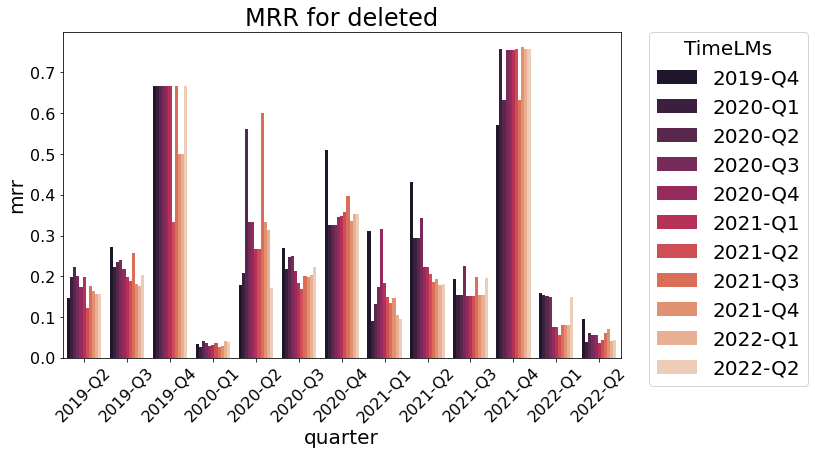

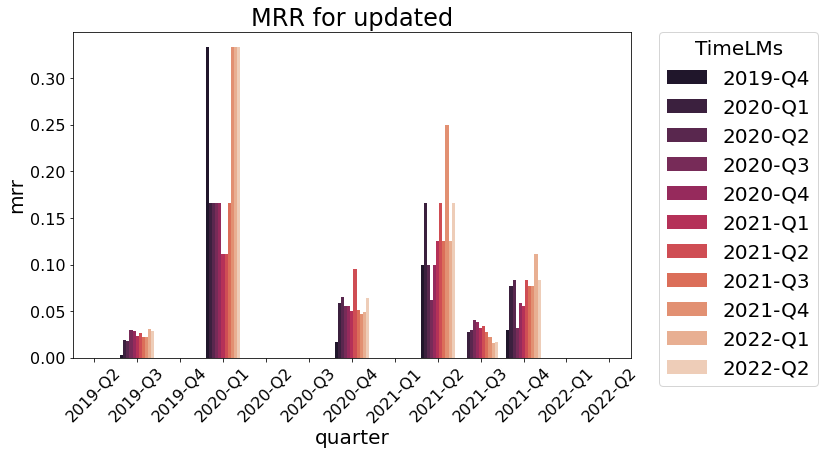

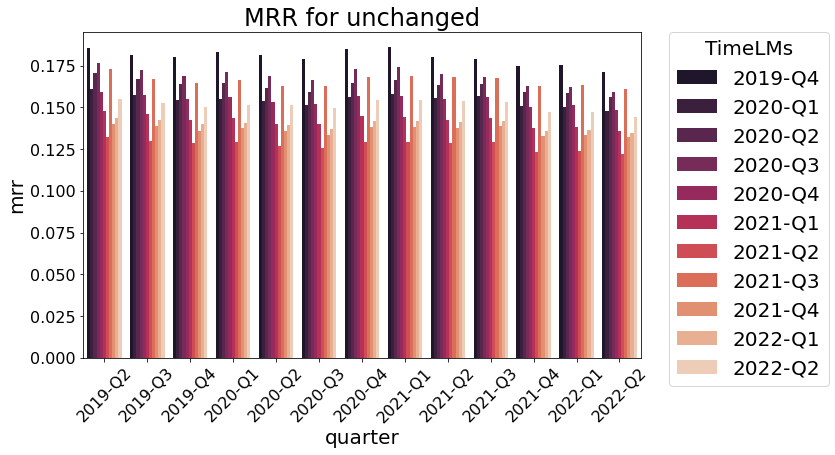

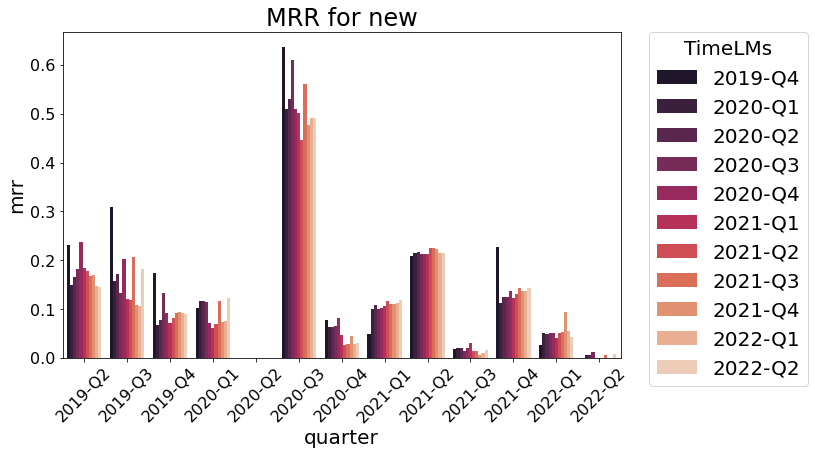

In [100]:
for split in list(set(results_df['split'])):
    _df = results_df[results_df['split']==split]
    fig, axs = plt.subplots(1,1, figsize=(10, 6), sharex=True)
    axs = [axs]
    # sns.barplot(x='year', y="P@1", data=results_df, hue='model', palette="rocket", ax=axs[0])
    sns.barplot(x='quarter', y="mrr", data=_df, hue='model', palette="rocket")
    # sns.barplot(x='year', y="P@20", data=results_df, hue='model', palette="rocket", ax=axs[2])
    # sns.barplot(x='year', y="P@50", data=results_df, hue='model', palette="rocket", ax=axs[3])
    # sns.barplot(x='year', y="P@100", data=results_df, hue='model', palette="rocket", ax=axs[4])
    # [ax.get_legend().remove() for ax in axs[:-1]]
    # [ax.set_xlabel("") for ax in axs[:-1]]
    # axs[4].set_xlabel("Test split (year)")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0, title='TimeLMs')
    for ax in axs:
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.rcParams.update({'font.size': 20})
    plt.xticks(rotation=45)
    plt.title("MRR for {}".format(split))
    plt.savefig('plots/MRR_quarters_all_models_{}.png'.format(split), bbox_inches = 'tight',edgecolor='white',dpi=500)

## Overall performamce

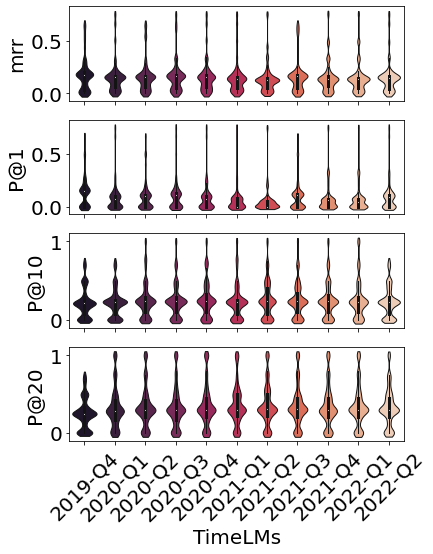

In [130]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1, figsize=(6, 8), sharex=True)
# sns.set_theme(style="ticks")
sns.violinplot(data=results_df, y='mrr', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax0)
sns.violinplot(data=results_df, y='P@1', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax1)
sns.violinplot(data=results_df, y='P@10', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax2)
sns.violinplot(data=results_df, y='P@20', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax3)
plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("TimeLMs")
# ax0.set_title('P@k of TimeLMs *on average* across the last 4 years (2019-2022).')
plt.savefig('plots/P@k_avg_time_last4years_quarter.png', bbox_inches = 'tight', dpi=500)

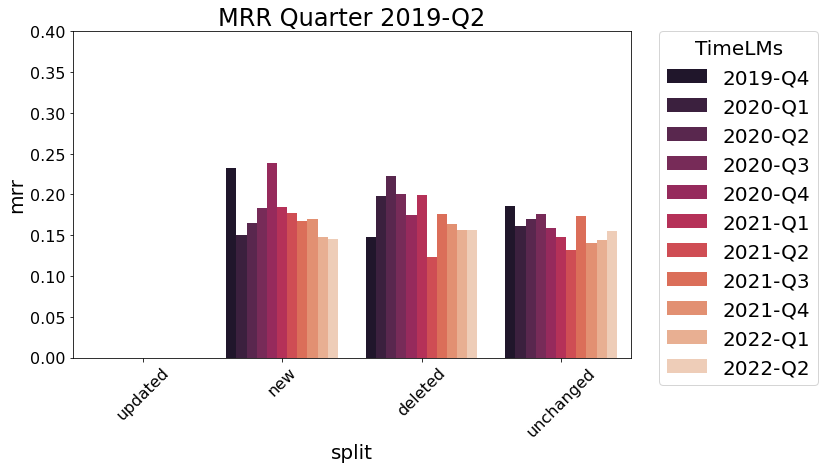

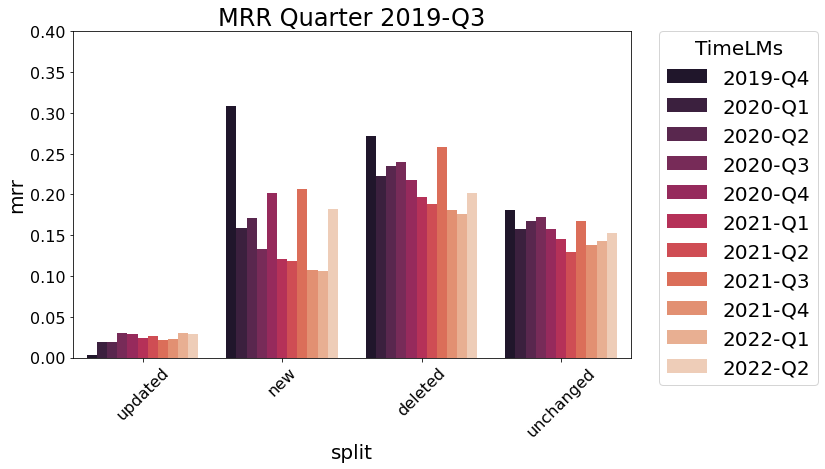

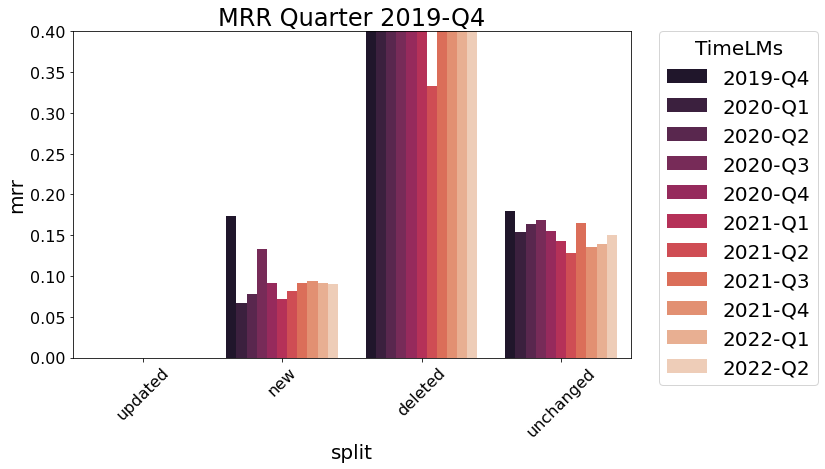

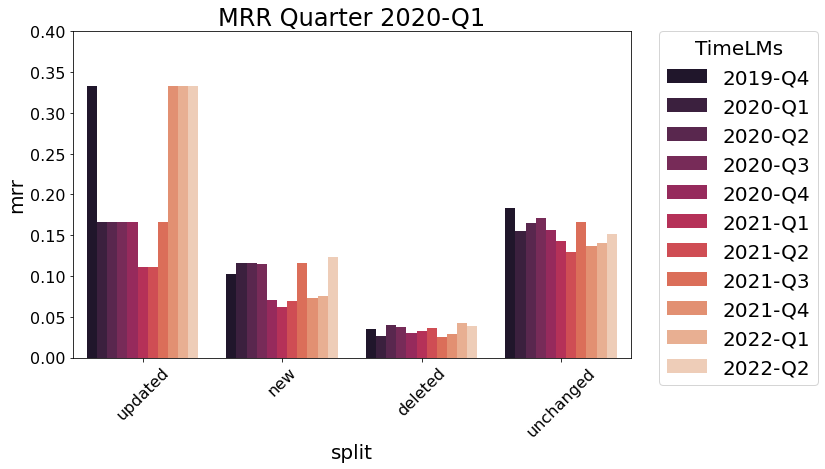

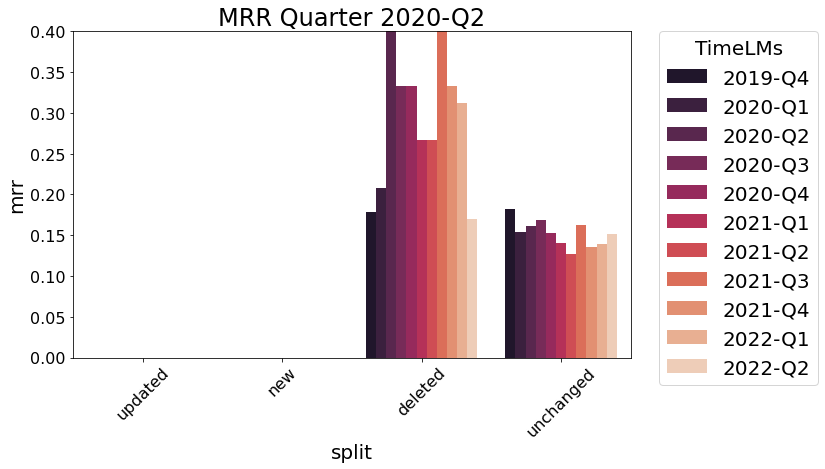

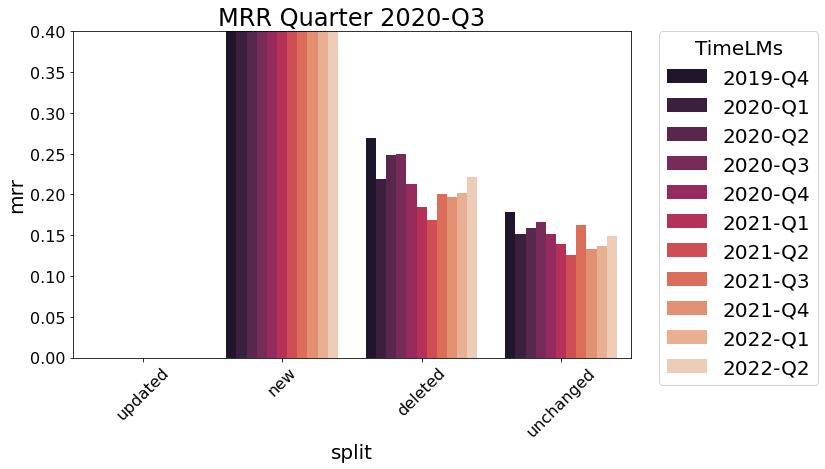

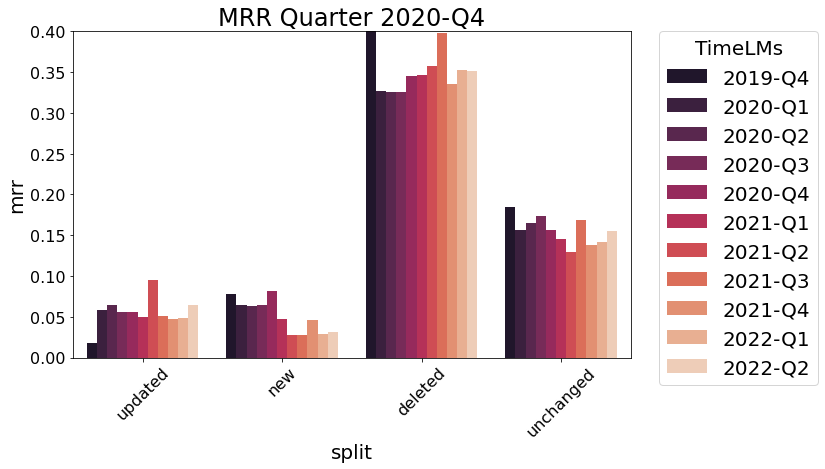

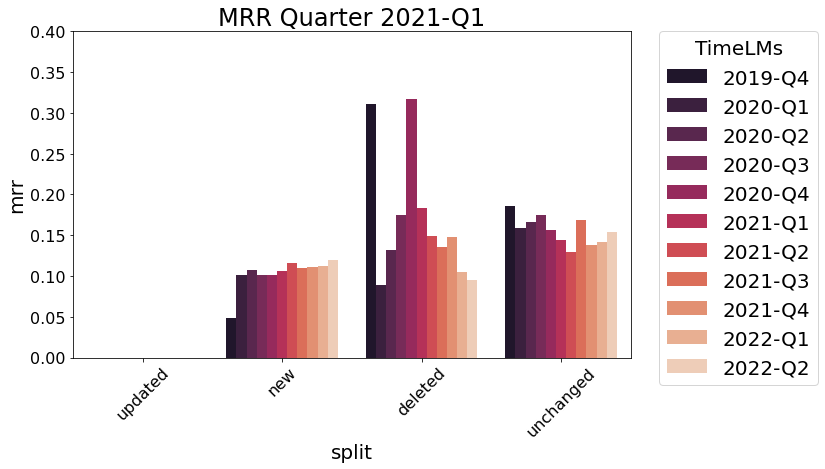

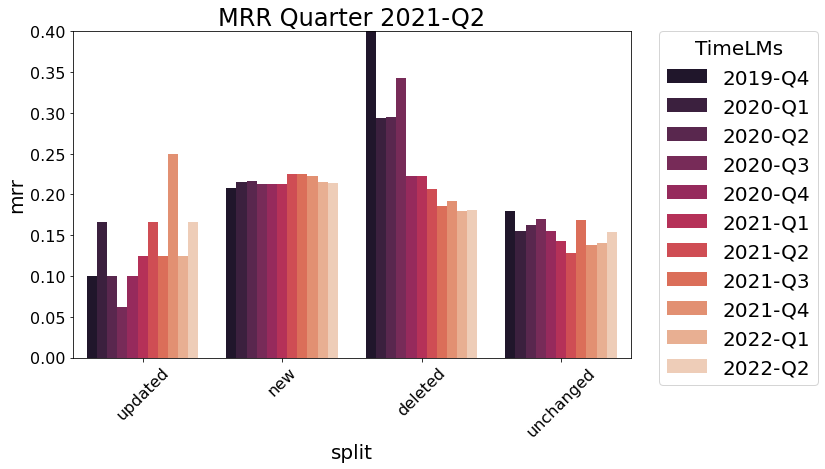

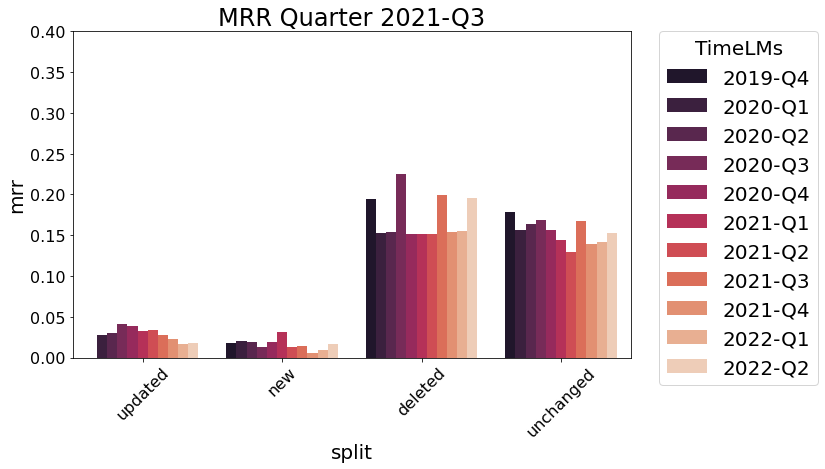

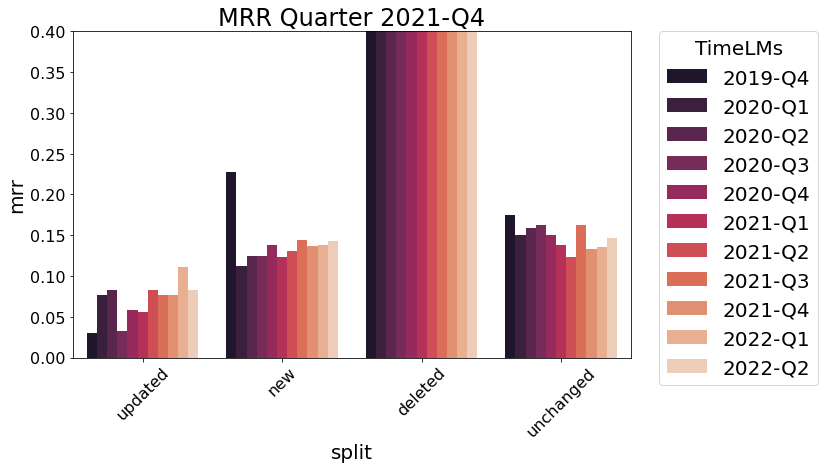

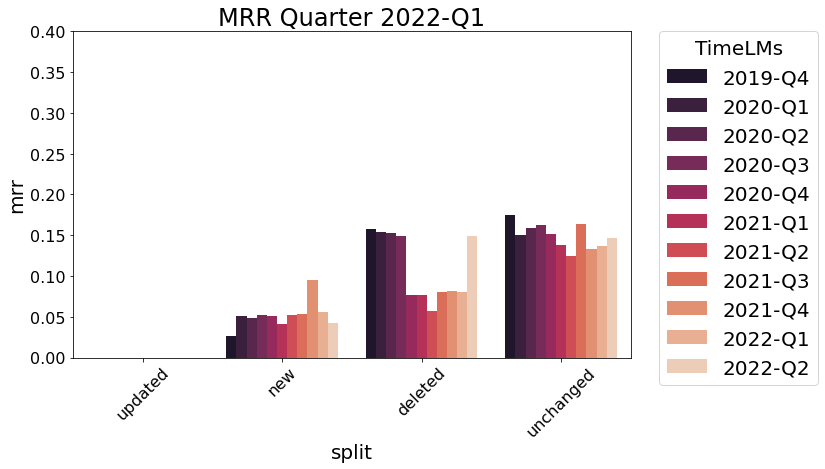

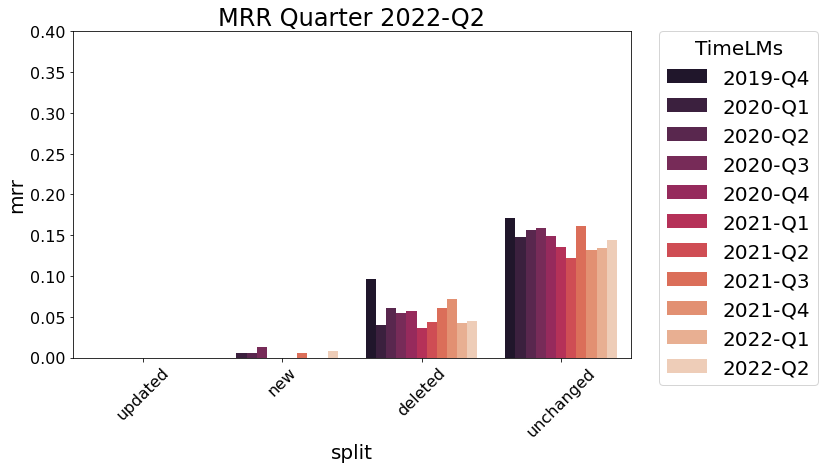

In [138]:
## Filter data
# for split in 
for quarter in sorted(list(set(results_df['quarter']))):
    _df = results_df[results_df['quarter']==quarter]
    fig, axs = plt.subplots(1,1, figsize=(10, 6), sharex=True)
    axs = [axs]
    # sns.barplot(x='year', y="P@1", data=results_df, hue='model', palette="rocket", ax=axs[0])
    sns.barplot(x='split', y="mrr", data=_df, hue='model', palette="rocket")
    # sns.barplot(x='year', y="P@20", data=results_df, hue='model', palette="rocket", ax=axs[2])
    # sns.barplot(x='year', y="P@50", data=results_df, hue='model', palette="rocket", ax=axs[3])
    # sns.barplot(x='year', y="P@100", data=results_df, hue='model', palette="rocket", ax=axs[4])
    # [ax.get_legend().remove() for ax in axs[:-1]]
    # [ax.set_xlabel("") for ax in axs[:-1]]
    # axs[4].set_xlabel("Test split (year)")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0, title='TimeLMs')
    for ax in axs:
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.rcParams.update({'font.size': 20})
    plt.xticks(rotation=45)
    ax.set_ylim([0, 0.4])
    plt.title("MRR Quarter {}".format(quarter))
    plt.savefig('plots/MRR_per_quarter_all_models_{}.png'.format(quarter), bbox_inches = 'tight',edgecolor='white',dpi=500)

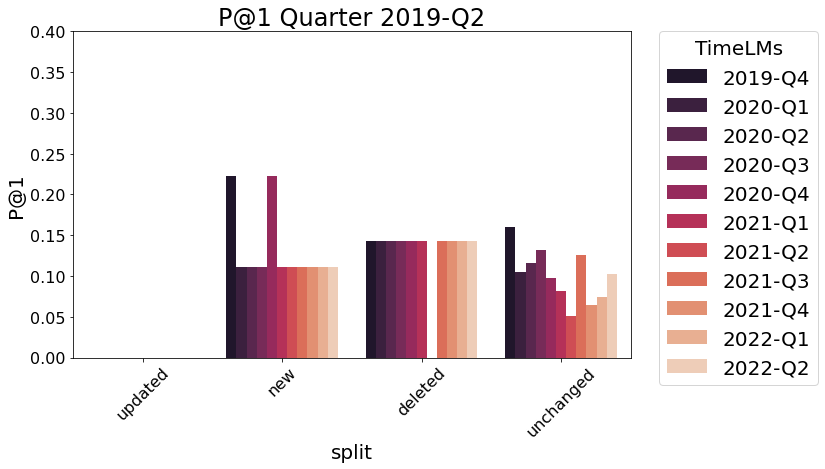

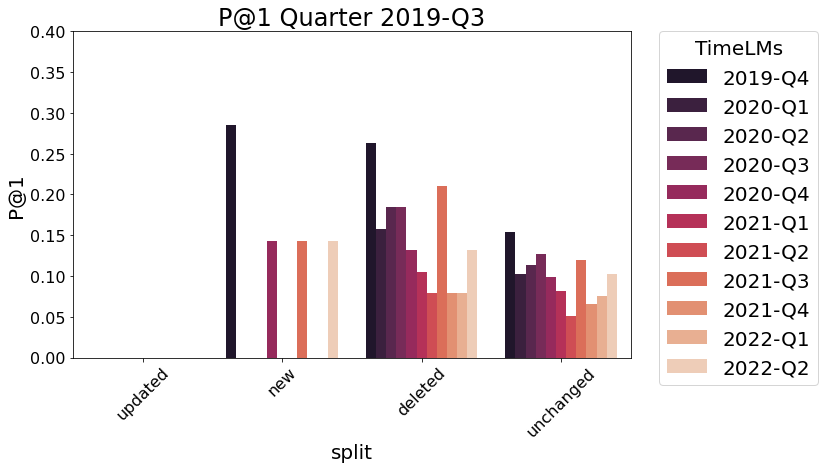

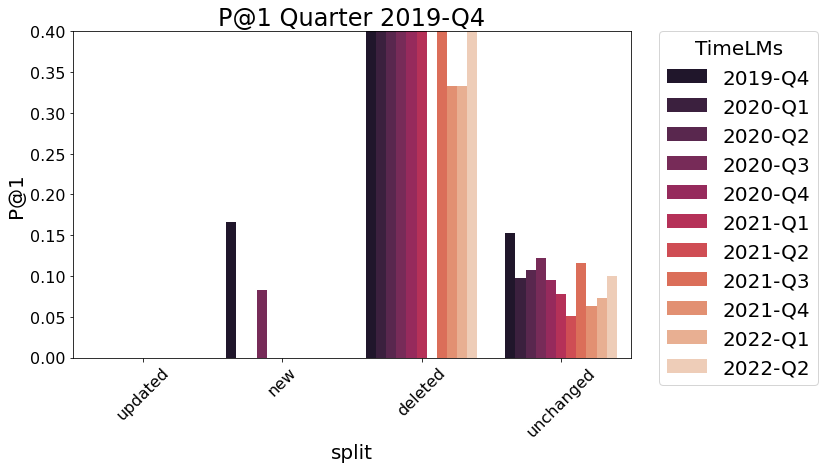

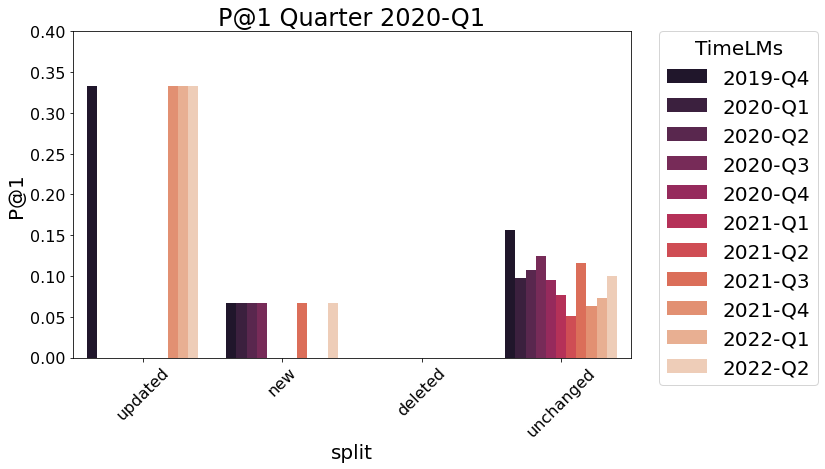

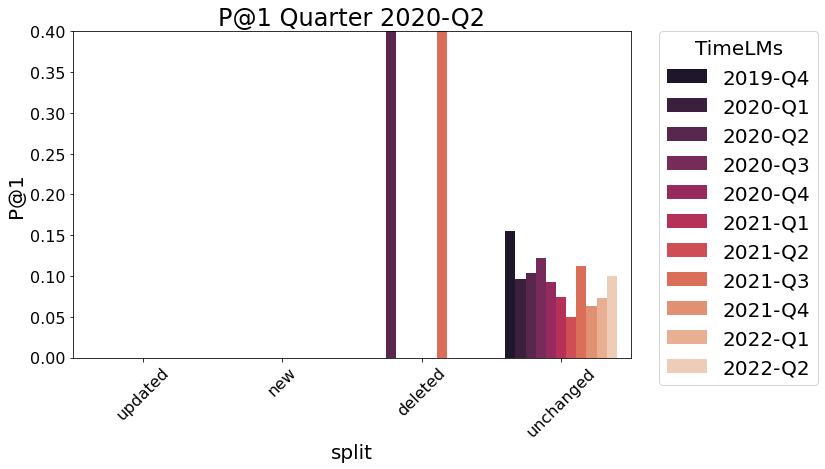

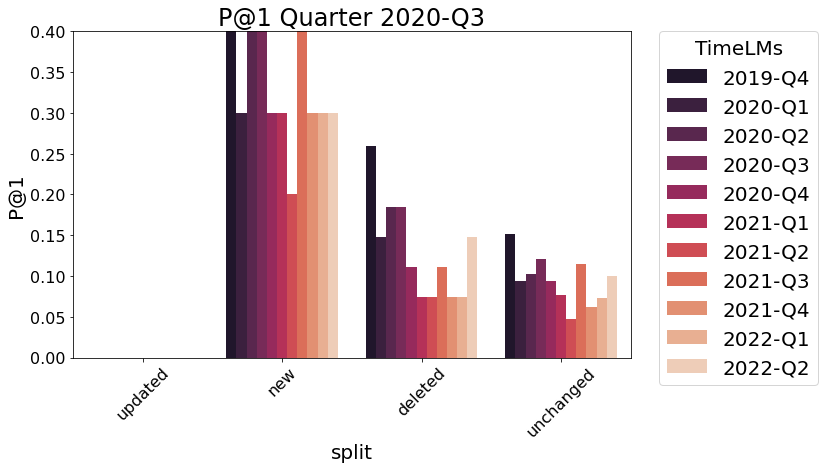

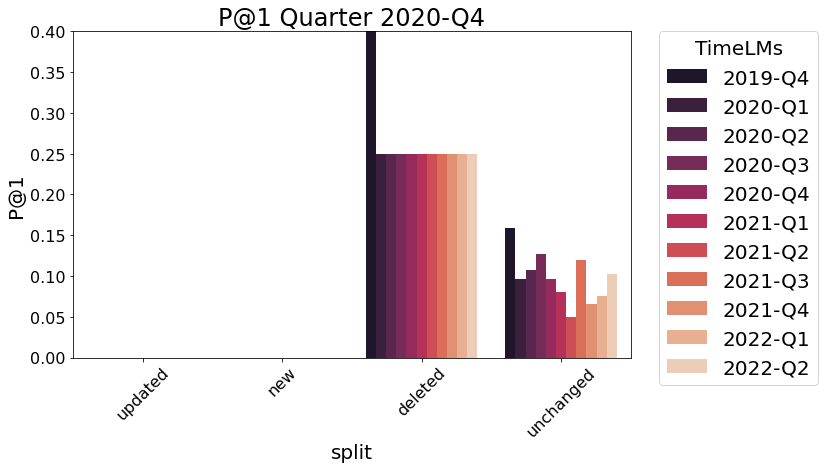

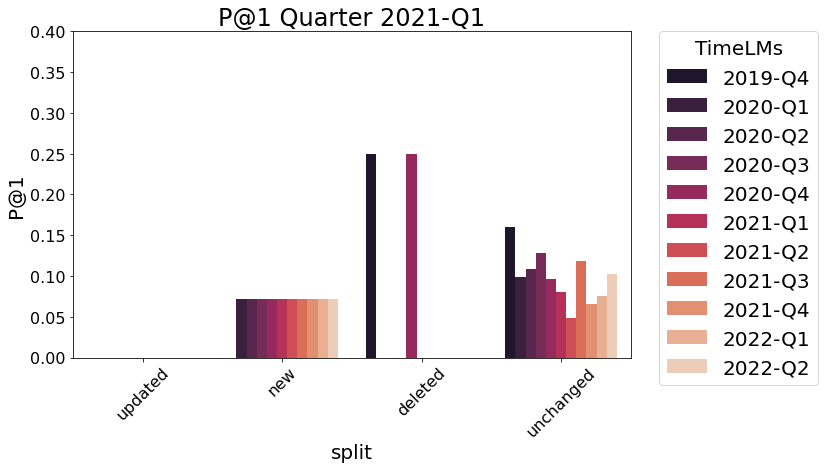

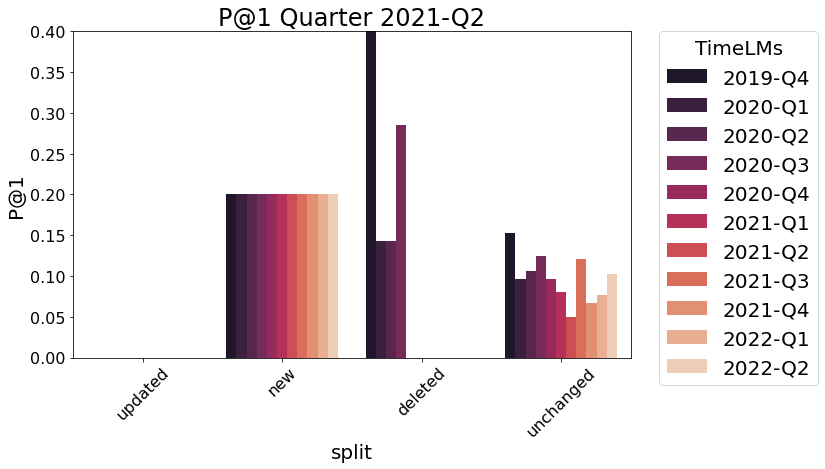

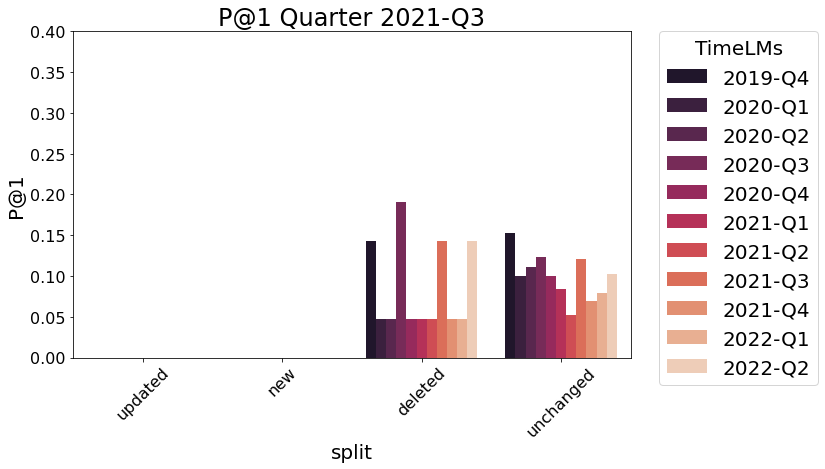

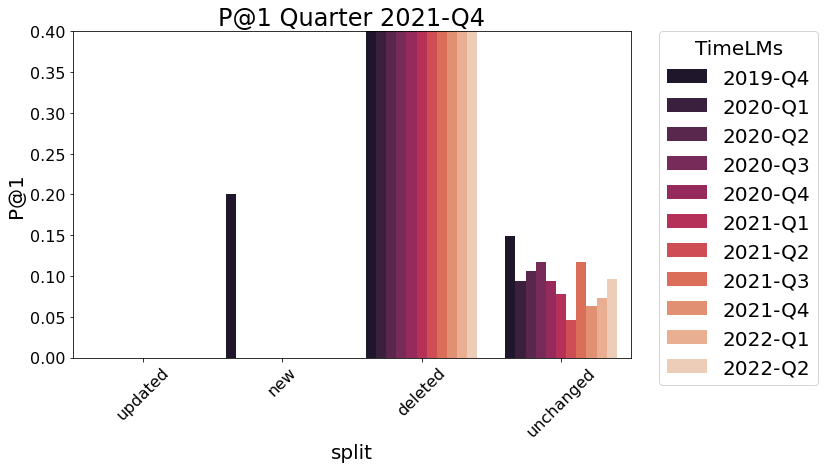

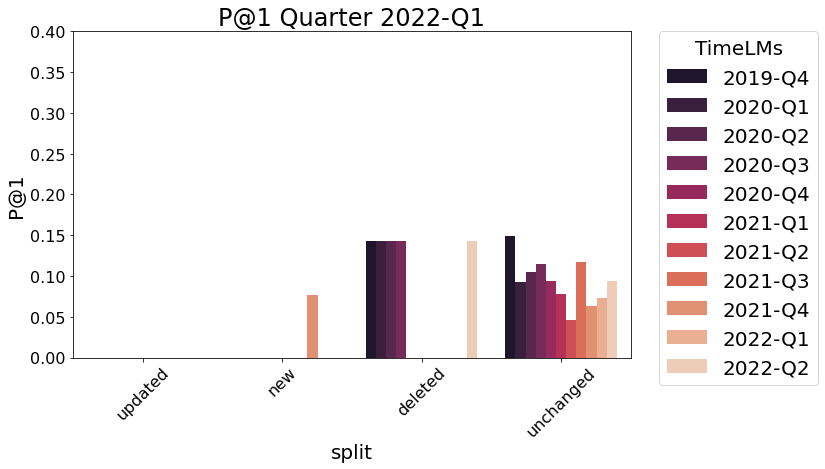

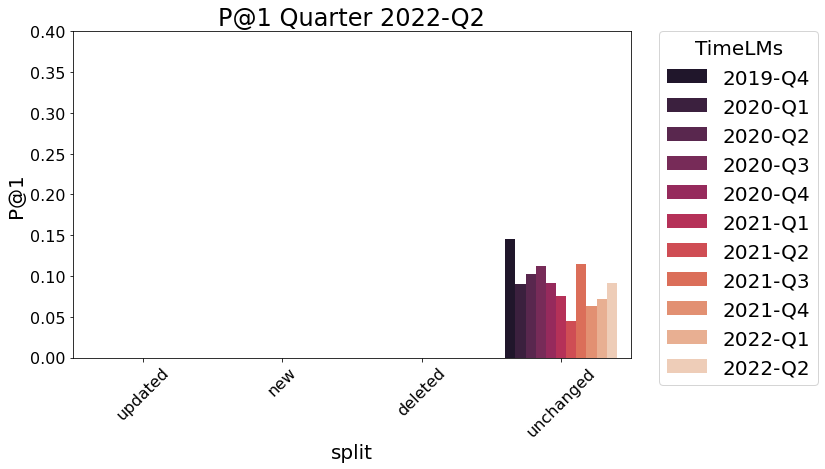

In [139]:
## Filter data
# for split in 
for quarter in sorted(list(set(results_df['quarter']))):
    _df = results_df[results_df['quarter']==quarter]
    fig, axs = plt.subplots(1,1, figsize=(10, 6), sharex=True)
    axs = [axs]
    # sns.barplot(x='year', y="P@1", data=results_df, hue='model', palette="rocket", ax=axs[0])
    sns.barplot(x='split', y="P@1", data=_df, hue='model', palette="rocket")
    # sns.barplot(x='year', y="P@20", data=results_df, hue='model', palette="rocket", ax=axs[2])
    # sns.barplot(x='year', y="P@50", data=results_df, hue='model', palette="rocket", ax=axs[3])
    # sns.barplot(x='year', y="P@100", data=results_df, hue='model', palette="rocket", ax=axs[4])
    # [ax.get_legend().remove() for ax in axs[:-1]]
    # [ax.set_xlabel("") for ax in axs[:-1]]
    # axs[4].set_xlabel("Test split (year)")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0, title='TimeLMs')
    for ax in axs:
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.rcParams.update({'font.size': 20})
    plt.xticks(rotation=45)
    ax.set_ylim([0, 0.4])
    plt.title("P@1 Quarter {}".format(quarter))
    plt.savefig('plots/P@1_per_quarter_all_models_{}.png'.format(quarter), bbox_inches = 'tight',edgecolor='white',dpi=500)

In [145]:
results_2_model_df = pd.read_csv(
    os.path.join(RES_DIR, 'timelms_2019-1-1_to_2022-12-31_per_quarter_2019-1-1_to_2022-12-31_per_quarter_single_mask.csv'))

In [146]:
results_2_model_df[['model', 'year', 'P@10', 'MRR']]

,model,year,P@10,MRR
0,cardiffnlp/twitter-roberta-base-2019-90m,2019-Q1,0.3248,0.2812
1,cardiffnlp/twitter-roberta-base-2019-90m,2019-Q2,0.3213,0.2784
2,cardiffnlp/twitter-roberta-base-2019-90m,2019-Q3,0.3225,0.2794
3,cardiffnlp/twitter-roberta-base-2019-90m,2019-Q4,0.3145,0.2728
4,cardiffnlp/twitter-roberta-base-2019-90m,2020-Q1,0.3109,0.2695
5,cardiffnlp/twitter-roberta-base-2019-90m,2020-Q2,0.3022,0.2664
6,cardiffnlp/twitter-roberta-base-2019-90m,2020-Q3,0.3137,0.2756
7,cardiffnlp/twitter-roberta-base-2019-90m,2020-Q4,0.3026,0.2665
8,cardiffnlp/twitter-roberta-base-2019-90m,2021-Q1,0.2830,0.2475
9,cardiffnlp/twitter-roberta-base-2019-90m,2021-Q2,0.2910,0.2505
